In [1]:
from tracemalloc import start
import alpaca_trade_api as tradeapi
from alpaca_trade_api.stream import Stream
import matplotlib.pyplot as plt
from alpaca_trade_api.rest import REST, TimeFrame
import pandas as pd
from datetime import date, datetime
import time
import talib
import yfinance as yf
# import finplot as fplt
# classifier = pipeline('sentiment-analysis')
import warnings
warnings.filterwarnings("ignore")

[*********************100%***********************]  1 of 1 completed


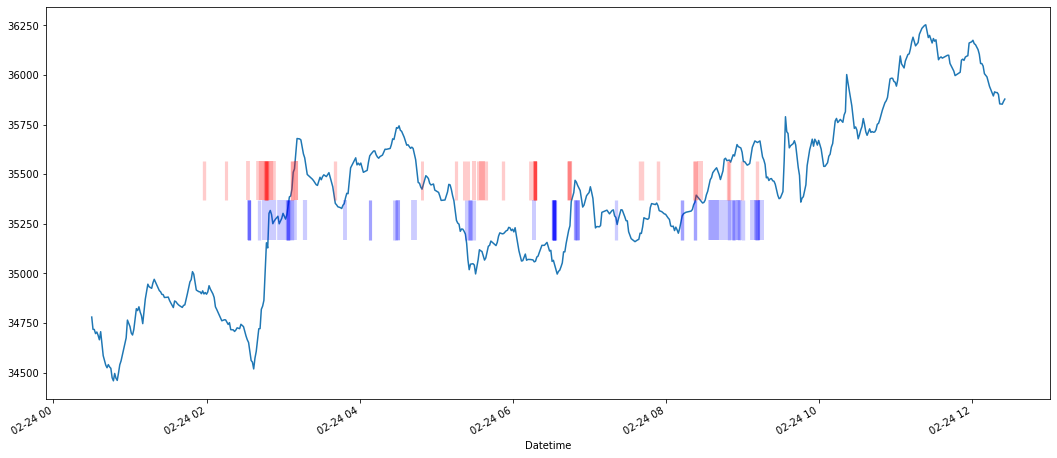

In [94]:
datetime_origin = '2022-02-24 00:30:00'
orders = pd.read_csv('large_ordersBTCUSD.txt')
orders.columns = ['DateTime', 'Size', 'Price', 'Side']
orders['DateTime'] = pd.to_datetime(orders['DateTime'])
orders.set_index('DateTime', inplace=True, drop = True)
orders.index = orders.index.tz_convert('US/Eastern')
orders = orders[orders.index > datetime_origin]
orders.Side = orders.Side.str.replace(' ', '')
orders = orders[orders.Size >= 3]
orders_B = orders[orders.Side == 'B']
orders_S = orders[orders.Side == 'S']
###########################################################################################
df = yf.download('BTC-USD', start = '2022-02-22', interval = '1m').tz_convert('US/Eastern')
df = df[df.index >= datetime_origin]
((df['Open']+df['Close'])/2).plot(figsize = (18,8))
plt.vlines(orders_B.index, ymin = df['Low'].mean() - 200, ymax = df['Low'].mean(), color = 'b', lw=orders.Size, alpha=0.2)
plt.vlines(orders_S.index, ymin = df['Low'].mean(), ymax = df['Low'].mean() + 200, color = 'r', lw=orders.Size, alpha=0.2)

In [12]:
orders.tail()

,Size,Price,Side
DateTime,,,
2022-02-23 17:16:01.117884-05:00,1.084166,37197.88,S
2022-02-23 17:16:01.123373-05:00,1.422618,37200.00,S
2022-02-23 17:16:01.123373-05:00,2.877900,37223.73,S
2022-02-23 17:16:01.453052-05:00,1.074922,37197.42,S
2022-02-23 17:16:09.813418-05:00,1.218532,37238.53,S


In [13]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-02-23 17:08:00-05:00,37581.253906,37581.253906,37581.253906,37581.253906,37581.253906,0
2022-02-23 17:09:00-05:00,37587.789062,37587.789062,37587.789062,37587.789062,37587.789062,116736
2022-02-23 17:10:00-05:00,37591.179688,37591.179688,37591.179688,37591.179688,37591.179688,4122624
2022-02-23 17:11:00-05:00,37594.750000,37594.750000,37594.750000,37594.750000,37594.750000,0
2022-02-23 17:12:00-05:00,37582.871094,37582.871094,37582.871094,37582.871094,37582.871094,1302528
